In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,confusion_matrix

In [ ]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Simple Correlaion
corr_matrix=df.corr()
print("Correlation matrix:",corr_matrix)
corr_coef=df["age"].corr(df["chol"])
print(corr_coef)

Correlation matrix:                age       sex        cp  trestbps  ...     slope        ca      thal    target
age       1.000000 -0.098447 -0.068653  0.279351  ... -0.168814  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353 -0.056769  ... -0.030711  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  0.047608  ...  0.119717 -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  1.000000  ... -0.121475  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  0.123174  ... -0.004038  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  0.177531  ... -0.059894  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421 -0.114103  ...  0.093045 -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762 -0.046698  ...  0.386784 -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  0.067616  ... -0.257748  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  

In [ ]:
#Partial Correlation
def partial_corr(df,X,y,covar):
  df_corr=df[[X,y,covar]].corr()
  r_Xy=df_corr.iloc[0,1]
  r_xcovar=df_corr.iloc[0,2]
  r_ycovar=df_corr.iloc[1,2]
  r_covar=df_corr.iloc[2,2]
  partial_corr_value=(r_Xy-r_xcovar*r_ycovar/np.sqrt(1-r_xcovar**2)*(1-r_ycovar**2))
  return partial_corr_value
result=partial_corr(df,"age","fbs","sex")
print(result)

0.12575348113939808


In [ ]:
#Multiple Correlation
Y="sex"
x1="age"
x2="chol"
df_corr=df[[Y,x1,x2]].corr()
r_yx1=df_corr.iloc[0,1]
r_yx2=df_corr.iloc[0,2]
r_x1x2=df_corr.iloc[1,2]
r=np.sqrt((r_yx1**2+r_yx2**2-2*(r_yx1*r_yx2*r_x1x2))/(1-r_x1x2**2))
print(r)

0.20609155765393583


In [ ]:
x=df["age"]
y=df["chol"]
corr,p_value=pearsonr(x,y)
print(f"Pearson Correaltion:{corr},P value:{p_value}")
corr,p_value=spearmanr(x,y)
print(f"Spearman Correaltion:{corr},P value:{p_value}")

Pearson Correaltion:0.2136779565595619,P value:0.00017862864341448777
Spearman Correaltion:0.19578599445342354,P value:0.000609914322285383


Intercept:102.29610118508204
slope:0.5394452340751621


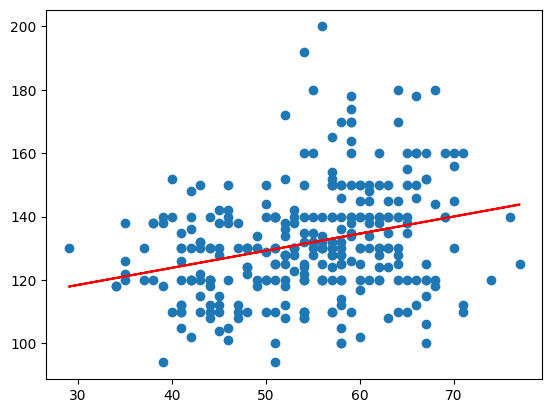

In [ ]:
#Simple Linear Regression
x=df[["age"]]
y=df["trestbps"]
model=LinearRegression()
model.fit(x,y)
print(f"Intercept:{model.intercept_}")
print(f"slope:{model.coef_[0]}")
y_pred=model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.show()

mse:6.863866064511711e-32
r2_score:1.0
age:-5.482809444782114e-18
chol:-4.336808689942018e-19
cp:-8.513866966031874e-17
fbs:1.0000000000000004


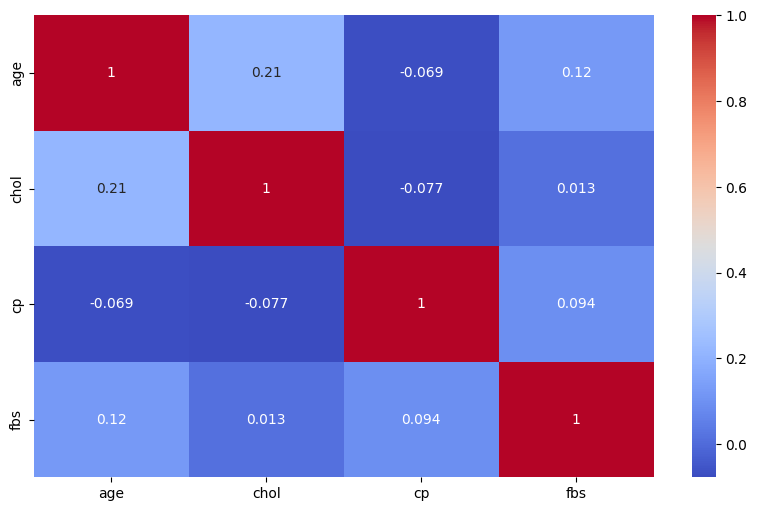

In [ ]:
x=df[["age","chol","cp","fbs"]]
y=df["fbs"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x_test)
print(f"mse:{mean_squared_error(y_test,y_pred)}")
print(f"r2_score:{r2_score(y_test,y_pred)}")
for i,col in enumerate(x.columns):
  print(f"{col}:{model.coef_[i]}")
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),annot=True,cmap="coolwarm")
plt.show()

accuracy:0.7704918032786885
classification_report:              precision    recall  f1-score   support

           0       0.77      1.00      0.87        47
           1       0.00      0.00      0.00        14

    accuracy                           0.77        61
   macro avg       0.39      0.50      0.44        61
weighted avg       0.59      0.77      0.67        61

confusion_matrix:[[47  0]
 [14  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


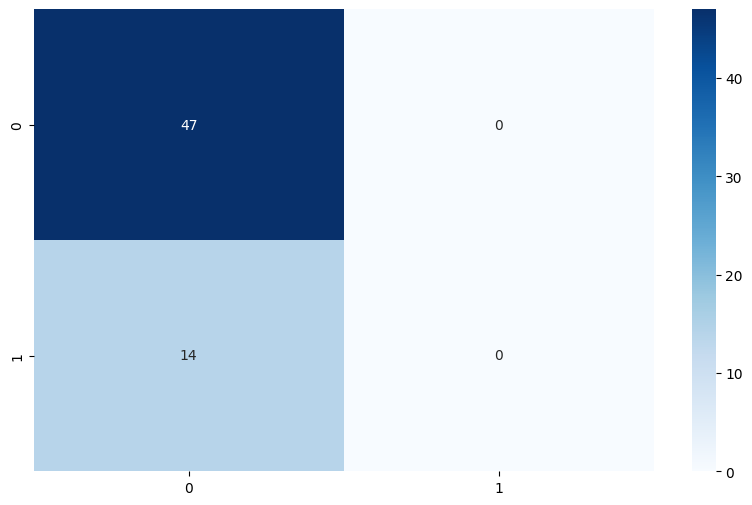

In [ ]:
x=df[["age","chol","cp","trestbps"]]
y=df["fbs"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x,y)
y_pred=model.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,y_pred)}")
print(f"classification_report:{classification_report(y_test,y_pred)}")
print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}")
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")
plt.show()

In [ ]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#Small Sample
#t-test
data=df["trestbps"].values
population_mean=150
t_statistic,p_value=stats.ttest_1samp(data,population_mean)
print(f"tstats:{t_statistic}")
print(f"P_value:{p_value}")
alpha=0.05
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")

tstats:-18.238718068521784
P_value:1.255589502558578e-50
Reject the nh


In [ ]:
#t test for two means
data1=df["trestbps"].values
data2=df["thalach"].values
t_statistic,p_value=stats.ttest_ind(data1,data2,equal_var=False)
print(f"tstats:{t_statistic}")
print(f"P_value:{p_value}")
alpha=0.05
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")

tstats:-10.874979144598083
P_value:3.8303006663356328e-25
Reject the nh


In [ ]:
#chi square for single variance
data=df["thalach"].values
n=len(data)
sample_variance=np.var(data,ddof=1)
population_variance=16
df_=n-1
chi_statistic=df_*sample_variance/population_variance
alpha=0.05
chi_critical_value=stats.chi2.ppf(1-alpha,df_)
print(f"chi statistic:{chi_statistic},critical value:{chi_critical_value}")
if chi_statistic>chi_critical_value:
  print("rejecr nh")
else:
  print("accept nh")

chi statistic:9902.700907590759,critical value:343.52929960594577
rejecr nh


In [ ]:
#F test for two variance
data1=df["thalach"].values
data2=df["trestbps"].values
n1=len(data1)
n2=len(data2)
sample_variance1=np.var(data1,ddof=1)
sample_variance2=np.var(data2,ddof=1)
df_1=n1-1
df_2=n2-1
F_statistic=sample_variance1/sample_variance2
alpha=0.05
F_critical_value=stats.f.ppf(1-alpha,df_1,df_2)
print(f"F statistic:{F_statistic},critical value:{F_critical_value}")
if F_statistic>F_critical_value:
  print("rejecr nh")
else:
  print("accept nh")

F statistic:1.7056876204744642,critical value:1.2087656829738258
rejecr nh


In [ ]:
#Fisher exact for two proprtions
data1=df["fbs"].values
data2=df["restecg"].values
n1=len(data1)
n2=len(data2)
success=1
num_successes1=np.sum(data1==1)
num_successes2=np.sum(data2==1)
contingency_table=np.array([[num_successes1,n1-num_successes1],[num_successes2,n2-num_successes2]])
odd_ratios,p_value=stats.fisher_exact(contingency_table)
print(f"odd ratio:{odd_ratios},p_value:{p_value}")
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")


odd ratio:0.17327111383108934,p_value:6.835110670356549e-21
Reject the nh


In [ ]:
#Z test for single mean
data=df["trestbps"].values
n=len(data)
sample_mean=np.mean(data)
population_mean=150
population_sd=4
z_statistic=(sample_mean-population_mean)/(population_sd/np.sqrt(n))
p_value=2*(1-stats.norm.cdf(abs(z_statistic)))
print(f"Zstats:{z_statistic}")
print(f"P_value:{p_value}")
alpha=0.05
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")

Zstats:-79.96831055530247
P_value:0.0
Reject the nh


In [ ]:
#Z test for two means
data1=df["trestbps"].values
data2=df["thalach"].values
n1=len(data1)
n2=len(data2)
sample_mean1=np.mean(data1)
sample_mean2=np.mean(data2)
population_sd1=4
population_sd2=6
z_statistic=(sample_mean1-sample_mean2)/np.sqrt((population_sd1**2/n1)+(population_sd2**2/n2))
p_value=2*(1-stats.norm.cdf(abs(z_statistic)))
print(f"Zstats:{z_statistic}")
print(f"P_value:{p_value}")
alpha=0.05
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")

Zstats:-43.50600350176523
P_value:0.0
Reject the nh


In [ ]:
#Z-test for single proportion
from statsmodels.stats.proportion import proportions_ztest
data=df["restecg"]
n=len(data)
success=1
num_success=np.sum(data==1)
population_proportion=0.50
z_statistic,p_value=proportions_ztest(num_success,n,population_proportion)
print(f"Zstats:{z_statistic}")
print(f"P_value:{p_value}")
alpha=0.05
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")

Zstats:0.057448811834344915
P_value:0.9541876809557214
accept nh


In [ ]:
#Z-test for two proportion
from statsmodels.stats.proportion import proportions_ztest
data1=df["restecg"]
data2=df["fbs"]
n1=len(data1)
n2=len(data2)
success=1
num_success1=np.sum(data1==1)
num_success2=np.sum(data2==1)
n=np.array([n1,n2])
num_success=np.array([num_successes1,num_successes2])
z_statistic,p_value=proportions_ztest(num_success,n)
print(f"Zstats:{z_statistic}")
print(f"P_value:{p_value}")
alpha=0.05
if p_value<alpha:
  print("Reject the nh")
else:
  print("accept nh")

Zstats:-9.279515952123274
P_value:1.7025023432467915e-20
Reject the nh


In [ ]:
f_stat,p_value=f_oneway(df["age"][df["target"]==0],df["age"][df["target"]==1])
print(f_stat,p_value)

16.116699823188288 7.524801303442268e-05


In [ ]:
model=ols("age~C(target)+C(sex)",data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
print(anova_table)

                 sum_sq     df          F    PR(>F)
C(target)   1732.428110    1.0  22.659464  0.000003
C(sex)       707.844016    1.0   9.258315  0.002552
Residual   22936.484179  300.0        NaN       NaN


In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("heart.csv")
df=data["trestbps"].values

In [ ]:
#Jackknife
original_mean=np.mean(df)
jackknife_samples=[np.delete(df,i) for i in range(len(df))]
jackknife_means=[np.mean(sample) for sample in jackknife_samples]
jackknife_mean_estimate=np.mean(jackknife_means)
bias=(n-1)*(original_mean-jackknife_mean_estimate)
jackknife_variance_estimate=(n-1)*np.var(jackknife_means)
print(f"original mean:{original_mean}")
print(f"jackknife mean estimate:{jackknife_mean_estimate}")
print(f"bias:{bias}")
print(f"jackknife variance estimate:{jackknife_variance_estimate}")

original mean:131.62376237623764
jackknife mean estimate:131.62376237623764
bias:0.0
jackknife variance estimate:1.0151368097271782


In [ ]:
original_variance=np.var(df,ddof=1)
jackknife_samples=[np.delete(df,i) for i in range(len(df))]
jackknife_variances=[np.var(sample,ddof=1) for sample in jackknife_samples]
jackknife_var_estimate=np.mean(jackknife_variances)
bias=(n-1)*(original_variance-jackknife_var_estimate)
jackknife_variance_estimate=(n-1)*np.var(jackknife_variances)
print(f"original variance:{original_variance}")
print(f"jackknife variance estimate:{jackknife_var_estimate}")
print(f"bias:{bias}")
print(f"jackknife variance estimate:{jackknife_variance_estimate}")

original variance:307.58645334732154
jackknife variance estimate:307.5864533473215
bias:1.716671249596402e-11
jackknife variance estimate:912.6734869752349


In [ ]:
#bootstrap
original_mean=np.mean(df)
n=len(df)
nums_bootstrap_samples=1000
bootstrap_samples=[np.random.choice(df,size=n,replace=True) for _ in range(nums_bootstrap_samples)]
bootstrap_means=[np.mean(sample) for sample in bootstrap_samples]
bootstrap_mean_estimate=np.mean(bootstrap_means)
bias=(n-1)*(original_mean-bootstrap_mean_estimate)
bootstrap_variance_estimate=(n-1)*np.var(bootstrap_means)
print(f"original mean:{original_mean}")
print(f"jackknife mean estimate:{bootstrap_mean_estimate}")
print(f"bias:{bias}")
print(f"jackknife variance estimate:{bootstrap_variance_estimate}")

original mean:131.62376237623764
jackknife mean estimate:131.5615379537954
bias:18.7917755775527
jackknife variance estimate:343.07725877166735


In [ ]:
original_variance=np.var(df,ddof=1)
bootstrap_samples=[np.delete(df,i) for i in range(len(df))]
bootstrap_variances=[np.var(sample,ddof=1) for sample in bootstrap_samples]
bootstrap_var_estimate=np.mean(bootstrap_variances)
bias=original_variance-bootstrap_var_estimate
bootstrap_variance_estimate=np.var(bootstrap_variances)
print(f"original variance:{original_variance}")
print(f"bootstrap variance estimate:{bootstrap_var_estimate}")
print(f"bias:{bias}")
print(f"bootstrap variance estimate:{bootstrap_variance_estimate}")

original variance:307.58645334732154
bootstrap variance estimate:307.5864533473215
bias:5.684341886080802e-14
bootstrap variance estimate:3.0220976389908443


In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
n=len(df)

In [ ]:
#Binomial
n=len(df)
x=np.sum(df["target"])
p_hat=x/n
alpha=0.05
z_alpha=stats.norm.ppf(1-alpha/2)
ci_lower=p_hat-z_alpha*np.sqrt(p_hat*(1-p_hat)/n)
ci_upper=p_hat+z_alpha*np.sqrt(p_hat*(1-p_hat)/n)
print(f"Confidence interval:({1-alpha*100}%):{ci_lower:.4f},{ci_upper:.4f}")

Confidence interval:(-4.0%):0.4885,0.6006


In [ ]:
#Poisson
lambda_hat=np.mean(df["age"])
alpha=0.05
z_alpha=stats.norm.ppf(1-alpha/2)
ci_lower=lambda_hat-z_alpha*np.sqrt(lambda_hat/n)
ci_upper=lambda_hat+z_alpha*np.sqrt(lambda_hat/n)
print(f"Confidence interval:({1-alpha*100}%):{ci_lower:.4f},{ci_upper:.4f}")

Confidence interval:(-4.0%):53.5361,55.1966


In [ ]:
#Normal
mu_hat=np.mean(df["age"])
sigma_hat=np.std(df["age"],ddof=1)
t_alpha=stats.t.ppf(1-alpha/2,n-1)
ci_lower=mu_hat-t_alpha*sigma_hat/np.sqrt(n)
ci_upper=mu_hat+t_alpha*sigma_hat/np.sqrt(n)
print(f"Confidence interval:({1-alpha*100}%):{ci_lower:.4f},{ci_upper:.4f}")

Confidence interval:(-4.0%):53.3396,55.3931


In [ ]:
#Exponential
mu_hat=1/np.mean(df["age"])
chi2_alpha_lower=stats.chi2.ppf(alpha/2,2*n)
chi2_alpha_upper=stats.chi2.ppf(1-alpha/2,2*n)
ci_lower=2*n/chi2_alpha_upper
ci_upper=2*n/chi2_alpha_lower
print(f"Confidence interval:({1-alpha*100}%):{ci_lower:.4f},{ci_upper:.4f}")

Confidence interval:(-4.0%):0.8963,1.1229


In [ ]:
#Metropolis
import numpy as np
import matplotlib.pyplot as plt
def likelihood(data,mu,sigma):
  return(1/sigma*np.sqrt(2*np.pi)*np.exp(-0.5*(data-mu/sigma)**2))
def prior(mu):
  return(1/1+mu**2)
def posterior(data,mu,sigma):
  return(prior(mu)*likelihood(data,mu,sigma))
def metropolis_hasting(data,initial_values,iterations):
  chain=np.zeros((iterations,2))
  acceptance=0
  [current_mu,current_sigma]=initial_values
  for i in range(iterations):
    proposal_mu=np.random.normal(current_mu,0.1)
    proposal_sigma=np.random.normal(current_sigma,0.1)
    p=posterior(data,proposal_mu,proposal_sigma)/posterior(data,current_mu,current_sigma)
    if np.random.uniform(0,1)<p:
      current_mu=proposal_mu
      current_sigma=proposal_sigma
      acceptance=+1
    chain[i]=[current_mu,current_sigma]
  acceptance_rate=acceptance/iterations
  return chain,acceptance_rate

In [ ]:
np.random.seed(42)
data=np.random.normal(3,2,100)
initial_values=[0,1]
iterations=10000
chain,acceptance_rate=metropolis_hasting(data,initial_values,iterations)
print(acceptance_rate)
chain_mu=chain[:,0]
chain_sigma=chain[:,1]
print(chain_mu)
print(chain_sigma)
plt.hist(chain_mu,bins=30,density=True,col="red",edgecolor="black",alpha=0.7)
plt.show()
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(chain_mu,color="red",alpha=0.7)
plt.show()
plt.hist(chain_sigma,bins=30,density=True,col="purple",edgecolor="black",alpha=0.7)
plt.show()
plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
plt.plot(chain_sigma,color="purple",alpha=0.7)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()